In [1]:
%load_ext autoreload
%autoreload 2

## Driving Change - Part 1: Building F1 Car Models with SOLID Principles
#### Subtitle: A Python-based Journey Through the 1950s-1980s era of F1 and the power of the Single Responsibility, Open Closed, and Dependency Inversion Principles

Formula One (F1) racing has been a premier motorsport event for over seven decades. As with any sport, technology has played a critical role in the evolution of F1. From the early days of the 1950s to the turbocharged cars of the 1980s, the cars have become faster, more efficient, and safer. However, the changing rules and regulations of the sport have made it challenging for engineers to create adaptable and maintainable code for F1 cars. This is where the SOLID principles of software design come in handy. In this article, we'll explore the history of F1 and see how applying SOLID principles in Python code can help create flexible and reusable code in the face of changing rules and requirements.

#### Single Responsibility Principle: How Separating Concerns Improved F1 Car Code in the 1950-1953

From the 1950-1953, Formula One World Championship had regulations with a maximum engine capacity of 1.5 liters for supercharged engines and 4.5 liters for naturally aspirated engines. Similar to the Alfa Romeos which dominated the competition in this period, our engine was also a 1.5 liter supercharged engine. When it comes to designing complex systems like Formula 1 (F1) cars, it's essential to have clear and concise code that can be easily maintained and extended over time. The Single Responsibility Principle (SRP) is one of the fundamental principles of object-oriented programming that can help achieve this goal.

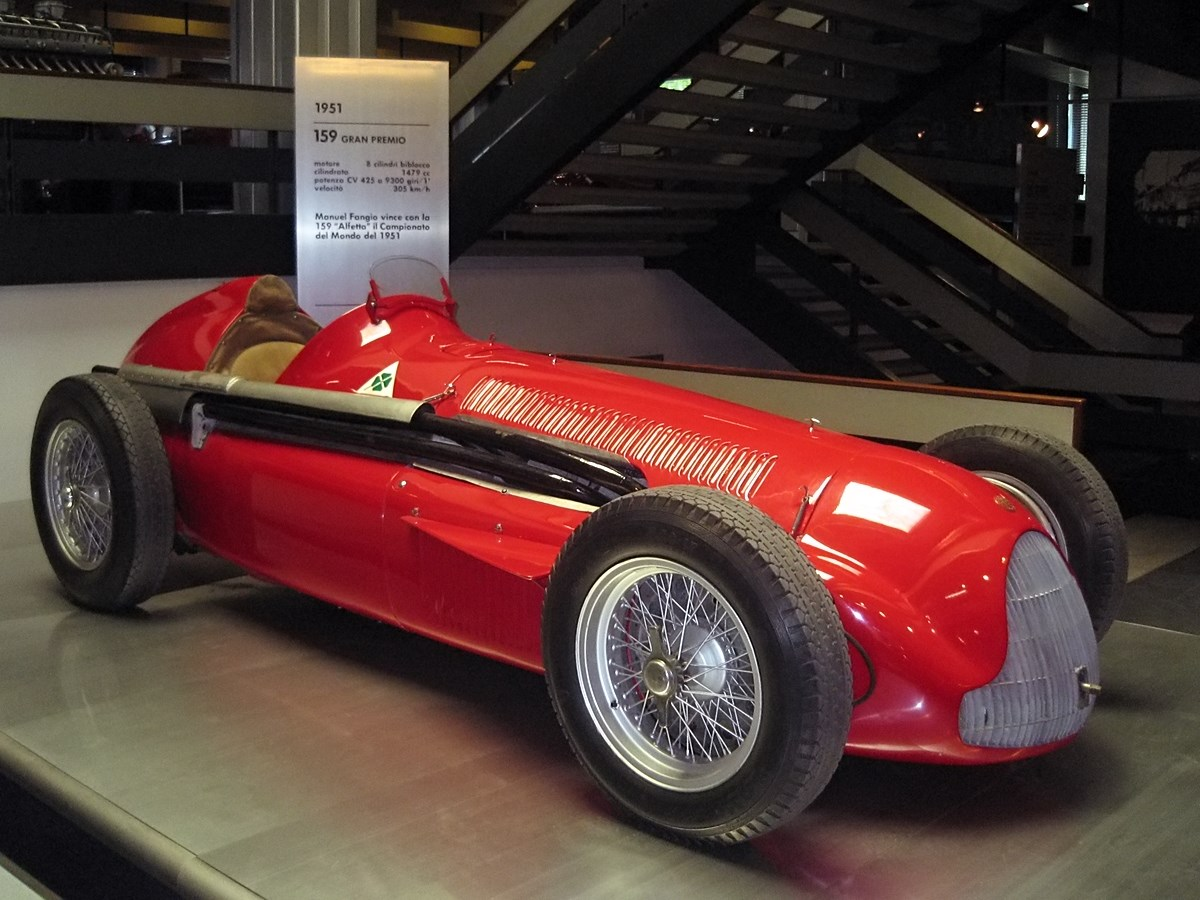

In [2]:
from IPython import display

display.Image("images/Alfa-Romeo-159-(1951).jpg")

In [3]:
from app.f1_cars.f1_car_v1 import F1Car_v1

Throughout the season, the engineering team continuously tests & improves different parts of the car. Each time this happens, the car needs to be tested to make sure it still runs. With the current implementation of our F1 car the engineering team isn't able to test the engine, or any of it's parts in isolation. This only way to ensure the car still works when a new engine is fitted is to create a whole new car

In [4]:
def test_f1_car_engine_by_constructing_a_new_one():
    f1_car = F1Car_v1()
    f1_car.start_engine()
    assert f1_car.engine.has_started == True

In [5]:
test_f1_car_engine_by_constructing_a_new_one()

Engine has started


This is a big issue as we don't want create a car every time we want to test the engine! To resolve this, we can delegate the creation of the engine, chassis, and wheels to the factory so the car does not need to know how they're implemented. Therefore the F1 car would not need to re-created every time the engine changes; moreover the engine can be tested independently of the car!

In [6]:
from app.chassis import ChassisFactory
from app.engine import EngineFactory
from app.fuel_tank import FuelTankFactory
from app.wheels import WheelsFactory

Then we could update the class like so:

In [7]:
from app.f1_cars.f1_car_v2 import F1Car_v2

Then the engine can be easily tested!

In [8]:
def test_f1_car_engine():
    engine = EngineFactory.create_engine_1950s_1_5L_supercharged_v1()
    engine.start()
    assert engine.has_started is True

In [9]:
test_f1_car_engine()

Engine has started


By removing the construction of the parts of the `F1Car` from it's responsibilities, we have in effect applied the Single Responsibility Principle. Since the car is not responsible for building the engine, if there is an issue during the construction of the engine it can be isolated to the factory, moreover, the engine is able to be tested independently of the car! 

### Open closed principle

#### The Open-Closed Principle: How F1 Cars Adapted to Changing Regulations in the mid 1950s to 1980s

By the end of 1952, it was evident that the supercharged engine was a deadend compared to the naturally aspirated engine as:
    
1. Reliability: One of the main advantages of naturally aspirated engines is their reliability. Superchargers put additional stress on the engine, which can lead to mechanical issues and failures. In contrast, naturally aspirated engines are simpler and more robust, and can withstand the demands of racing over longer distances.
2. Fuel consumption: The 1.5-liter supercharged engine was known for its high fuel consumption, which could be a disadvantage in races where fuel efficiency was a concern. The 4.5-liter naturally aspirated engine, on the other hand, was more fuel-efficient and could complete a race on a single tank of fuel. This meant less time in the pitlane refueling.
3. Power delivery: While the supercharged engine had the potential to produce more power, it tended to have a narrow powerband and could be difficult to control. The naturally aspirated engine, in contrast, had a broader powerband and provided more predictable power delivery, which made it easier for drivers to control and manage during races.
4. Weight: The supercharged engine was heavier due to the addition of the supercharger, while the naturally aspirated engine was lighter and better-suited for use in the small, agile Formula One cars of the time.

Moreover, with the announcement of the F1 switching to only 2.5L naturally aspirated engines in the 1954, new engine development needed to be started. Thankfully, due to the logisitcal change we made in the previous iteration, new engine were able to be constructed and tested independently of the car! By the start of the 1954, a new engine was ready to be installed into the car:

In [10]:
engine = EngineFactory.create_engine_1950s_2_5L_naturally_aspirated_v1()

Though, can you see the problem? Although we've solved the problem of being able to test the engine in isolation, the car can't be reused, and it needs to be opened up for modifications and rebuilt. 

In particular, to use the new engine, the line:

`self.engine = EngineFactory.create_engine_1950s_1_5L_supercharged_v1()` in `F1Car_v2` would have to changed to 
`self.engine = EngineFactory.create_engine_1950s_2_5L_naturally_aspirated_v2()`

In [11]:
from app.f1_cars.f1_car_v3 import F1Car_v3

This is not ideal as the other parts of the car, the chassis and the wheels are still perfectly fine, but they can't be reused. Moreover, changing the whole car means more testing and more time taken! To resolve this issue, we could change the way the car is modeled by accepting the parts needed by the car in the constructor instead:

In [12]:
from app.f1_cars.f1_car_v4 import F1Car_v4

Then to represent the car with the new engine we first update the factory to create the new engine:

change:

In [13]:
f1_car = F1Car_v3()

to

In [14]:
f1_car = F1Car_v4(
    EngineFactory.create_engine_1950s_2_5L_naturally_aspirated_v1(),
    ChassisFactory.create_chassis_spaceframe_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
)

By modifying the code to take in the components that it needs, we have changed the car such that it's closed for modifications as regardless of the car part being used, the car does not need to change, and also it is open for extension (partially, but we will get to that later) as it will be able to take in a new type of engine without having it change the code.

Throughout the late 1950s-1980 there were a few changes and innovations:

In 1959, the mid-rear engines pioneered as opposed to the traditional front-end engined cars this meant: 

1. Improved weight distribution: With the engine located near the center of the car, the weight distribution is more balanced between the front and rear wheels. This can improve handling and traction, particularly during cornering.
2. Better aerodynamics: By placing the engine behind the driver, the front of the car can be designed with a lower profile, which reduces drag and improves airflow over the car.
3. Lower center of gravity: Placing the engine lower in the car can lower the center of gravity, which can improve stability and handling.

Due to the changed in how the car was built this could be easily supported without changing the car

In [15]:
f1_car = F1Car_v4(
    EngineFactory.create_engine_1950s_2_5L_naturally_aspirated_mid_rear_v1(),
    ChassisFactory.create_chassis_spaceframe_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
)

In 1961, a decision to downgrade Formula One to 1.5-liter, naturally aspirated engines was made in an attempt to address growing concerns about the increasing speeds of the cars and the safety implications of those speeds. In the late 1950s, Formula One cars were capable of reaching speeds in excess of 300 km/h (186 mph) on certain tracks, which many people felt was becoming too dangerous.

In [16]:
f1_car = F1Car_v4(
    EngineFactory.create_engine_1960s_1_5L_naturally_aspirated_mid_rear_v1(),
    ChassisFactory.create_chassis_spaceframe_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
)

In 1962, Lotus introduced the Lotus 25. It used introduction of monocoque chassis instead of the traditional spaceframe design. 

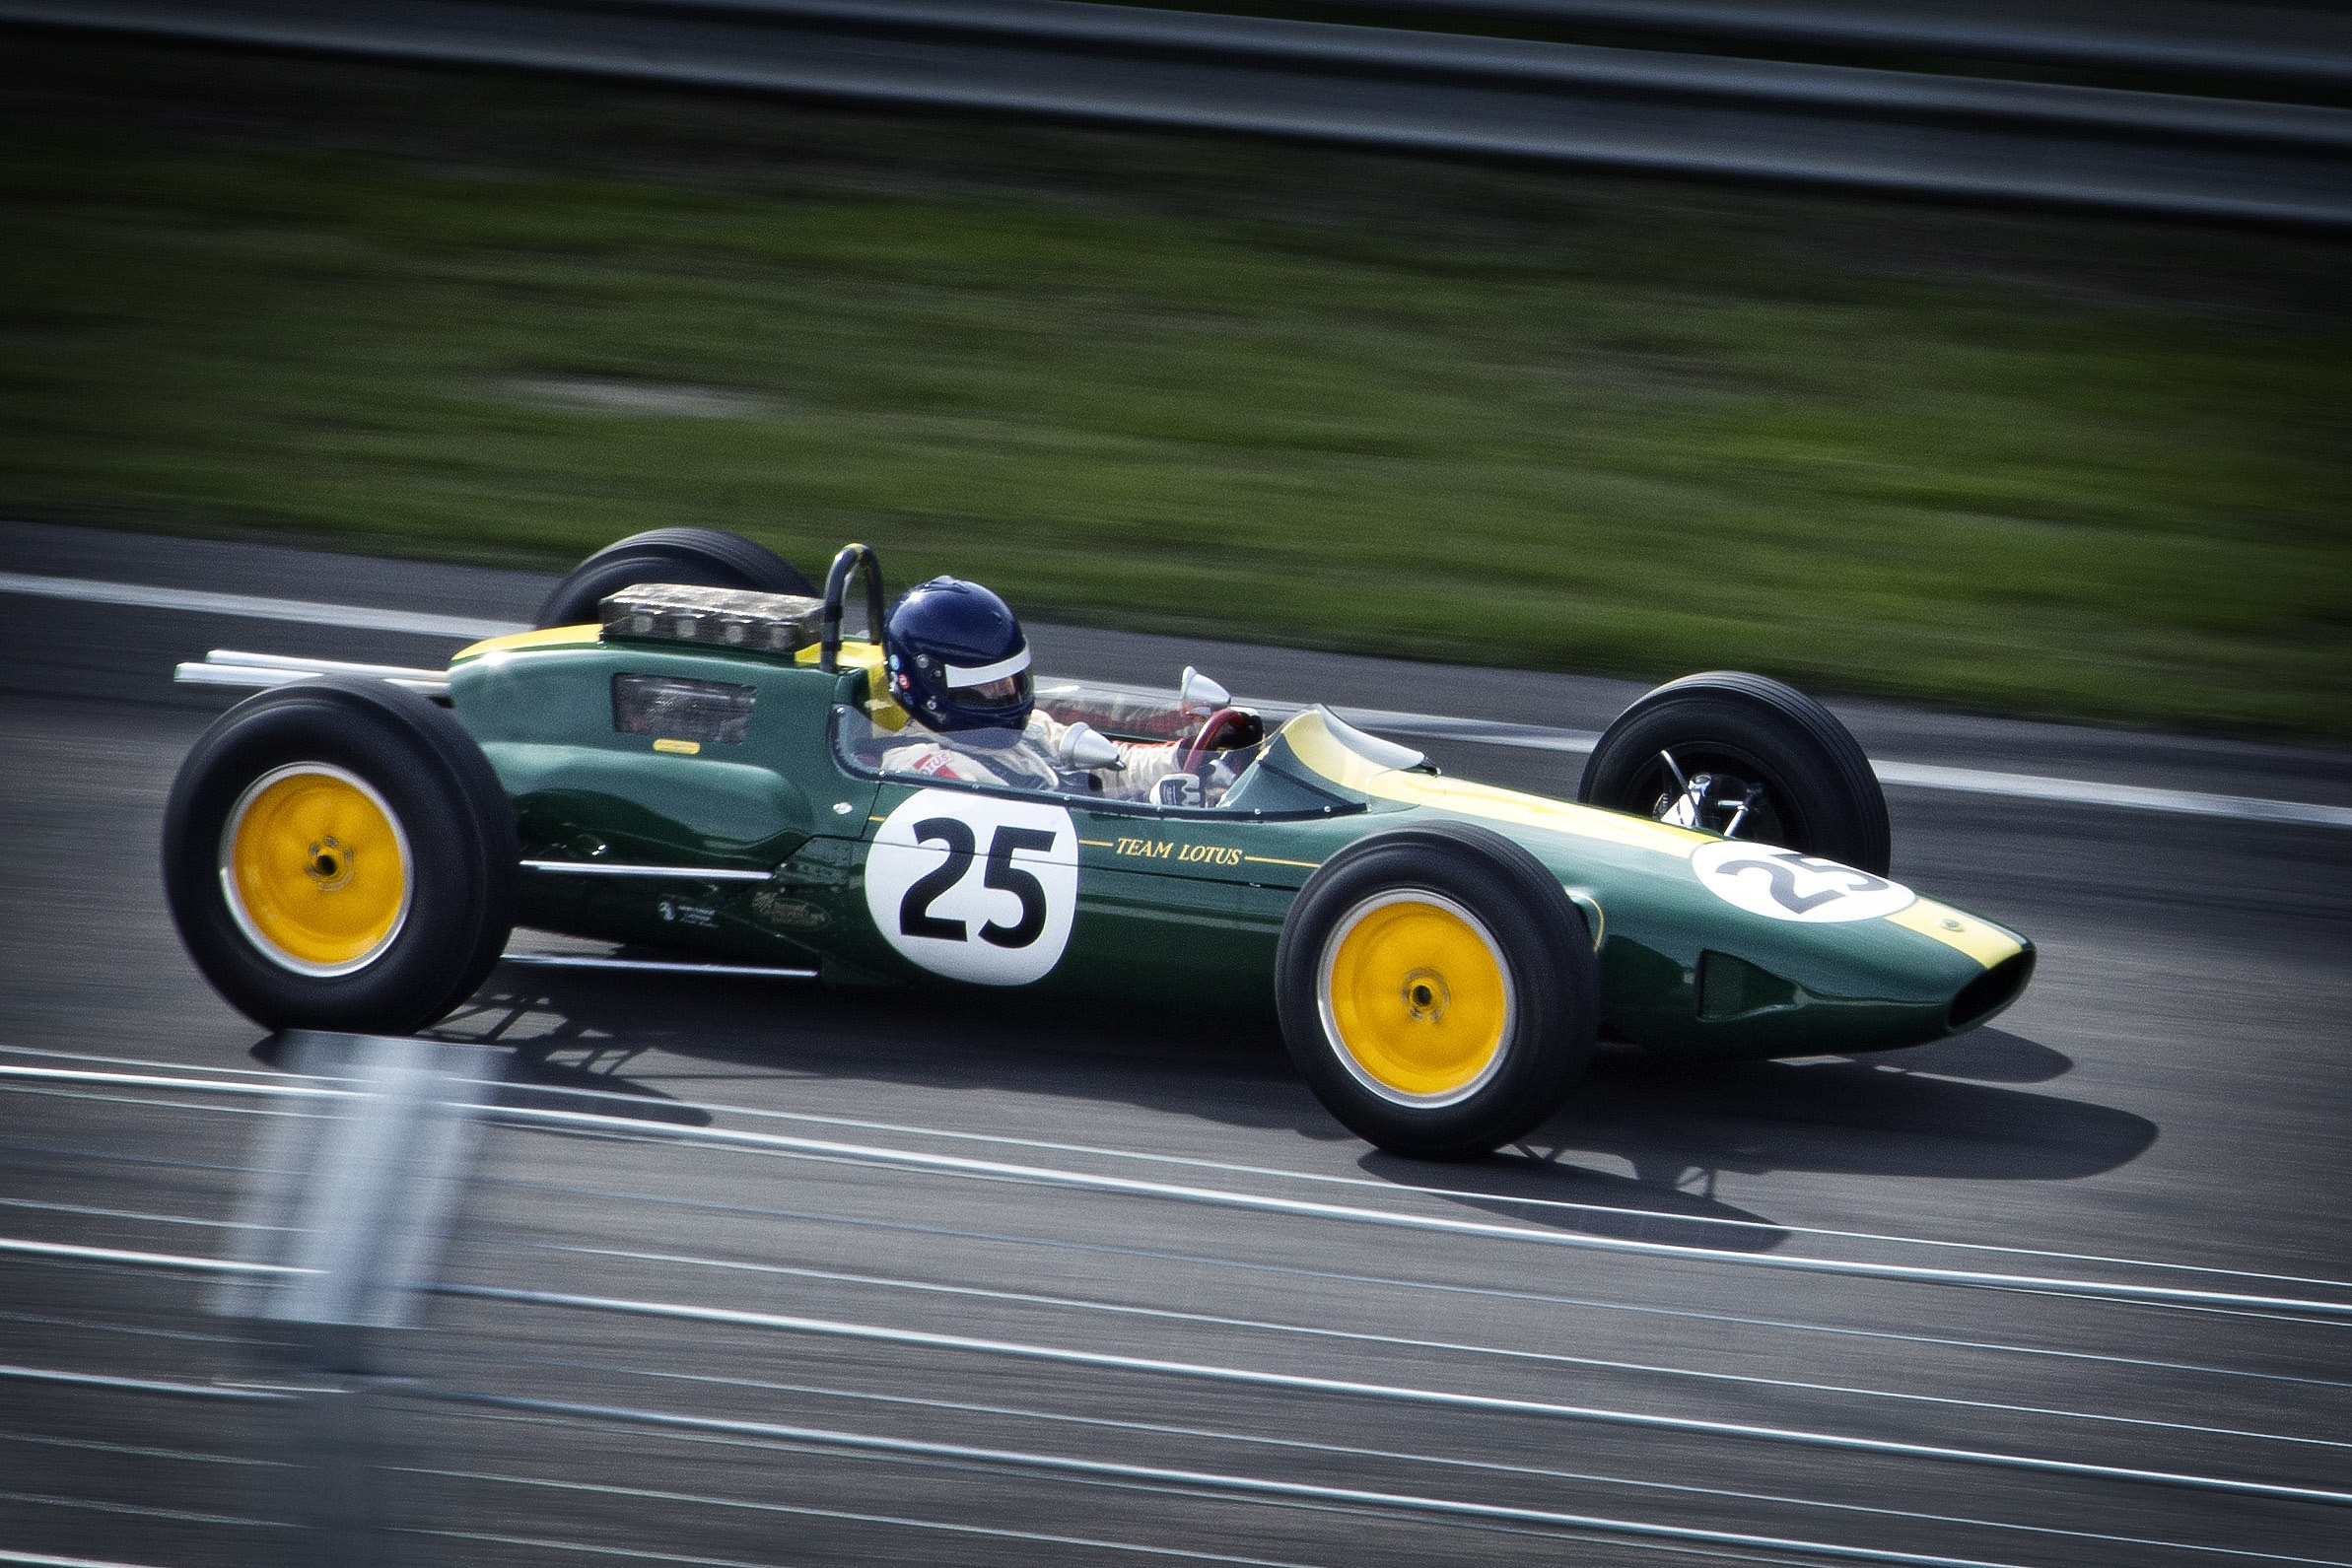

In [17]:
display.Image("images/1964_Lotus-Climax_25.jpeg")

A spaceframe design uses a network of small tubes or rods to create a rigid framework for a car's body.

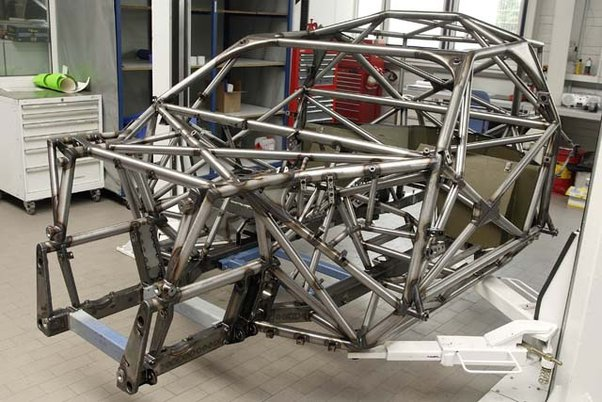

In [18]:
display.Image("images/spaceframe.jpeg")

Whereas monocoque chassis integrates the body and frame of the car into a single, strong, and lightweight structure. 

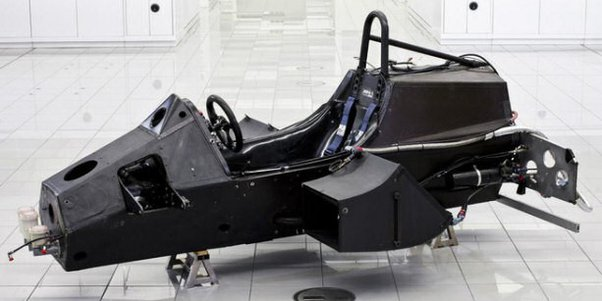

In [19]:
display.Image("images/monocoque.jpeg")

Compared to the traditional spaceframe design, the monocoque chassis had several advantages, including:

1. Improved rigidity: Because the monocoque chassis is a single, integrated structure, it is inherently more rigid and resistant to flexing and twisting than a spaceframe chassis. This can improve handling, stability, and overall performance.
2. Lighter weight: Monocoque chassis are typically lighter than spaceframe chassis of similar strength, which can improve acceleration, braking, and fuel efficiency.
3. Better safety: The monocoque chassis provides better protection for the driver in the event of a crash, as the entire structure of the car is designed to absorb and distribute impact forces.

The monocoque chassis change could be easily supported without changing the code

In [20]:
f1_car = F1Car_v4(
    EngineFactory.create_engine_1950s_2_5L_naturally_aspirated_mid_rear_v1(),
    ChassisFactory.create_chassis_monocoque_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
)

In 1966, the Formula One regulations were changed once again, and the following year saw the introduction of the Lotus 49, a revolutionary car designed by Colin Chapman and Maurice Philippe. The car featured several innovative design elements the main one being the Ford-Cosworth Double Four Valve (DFV) engine. 

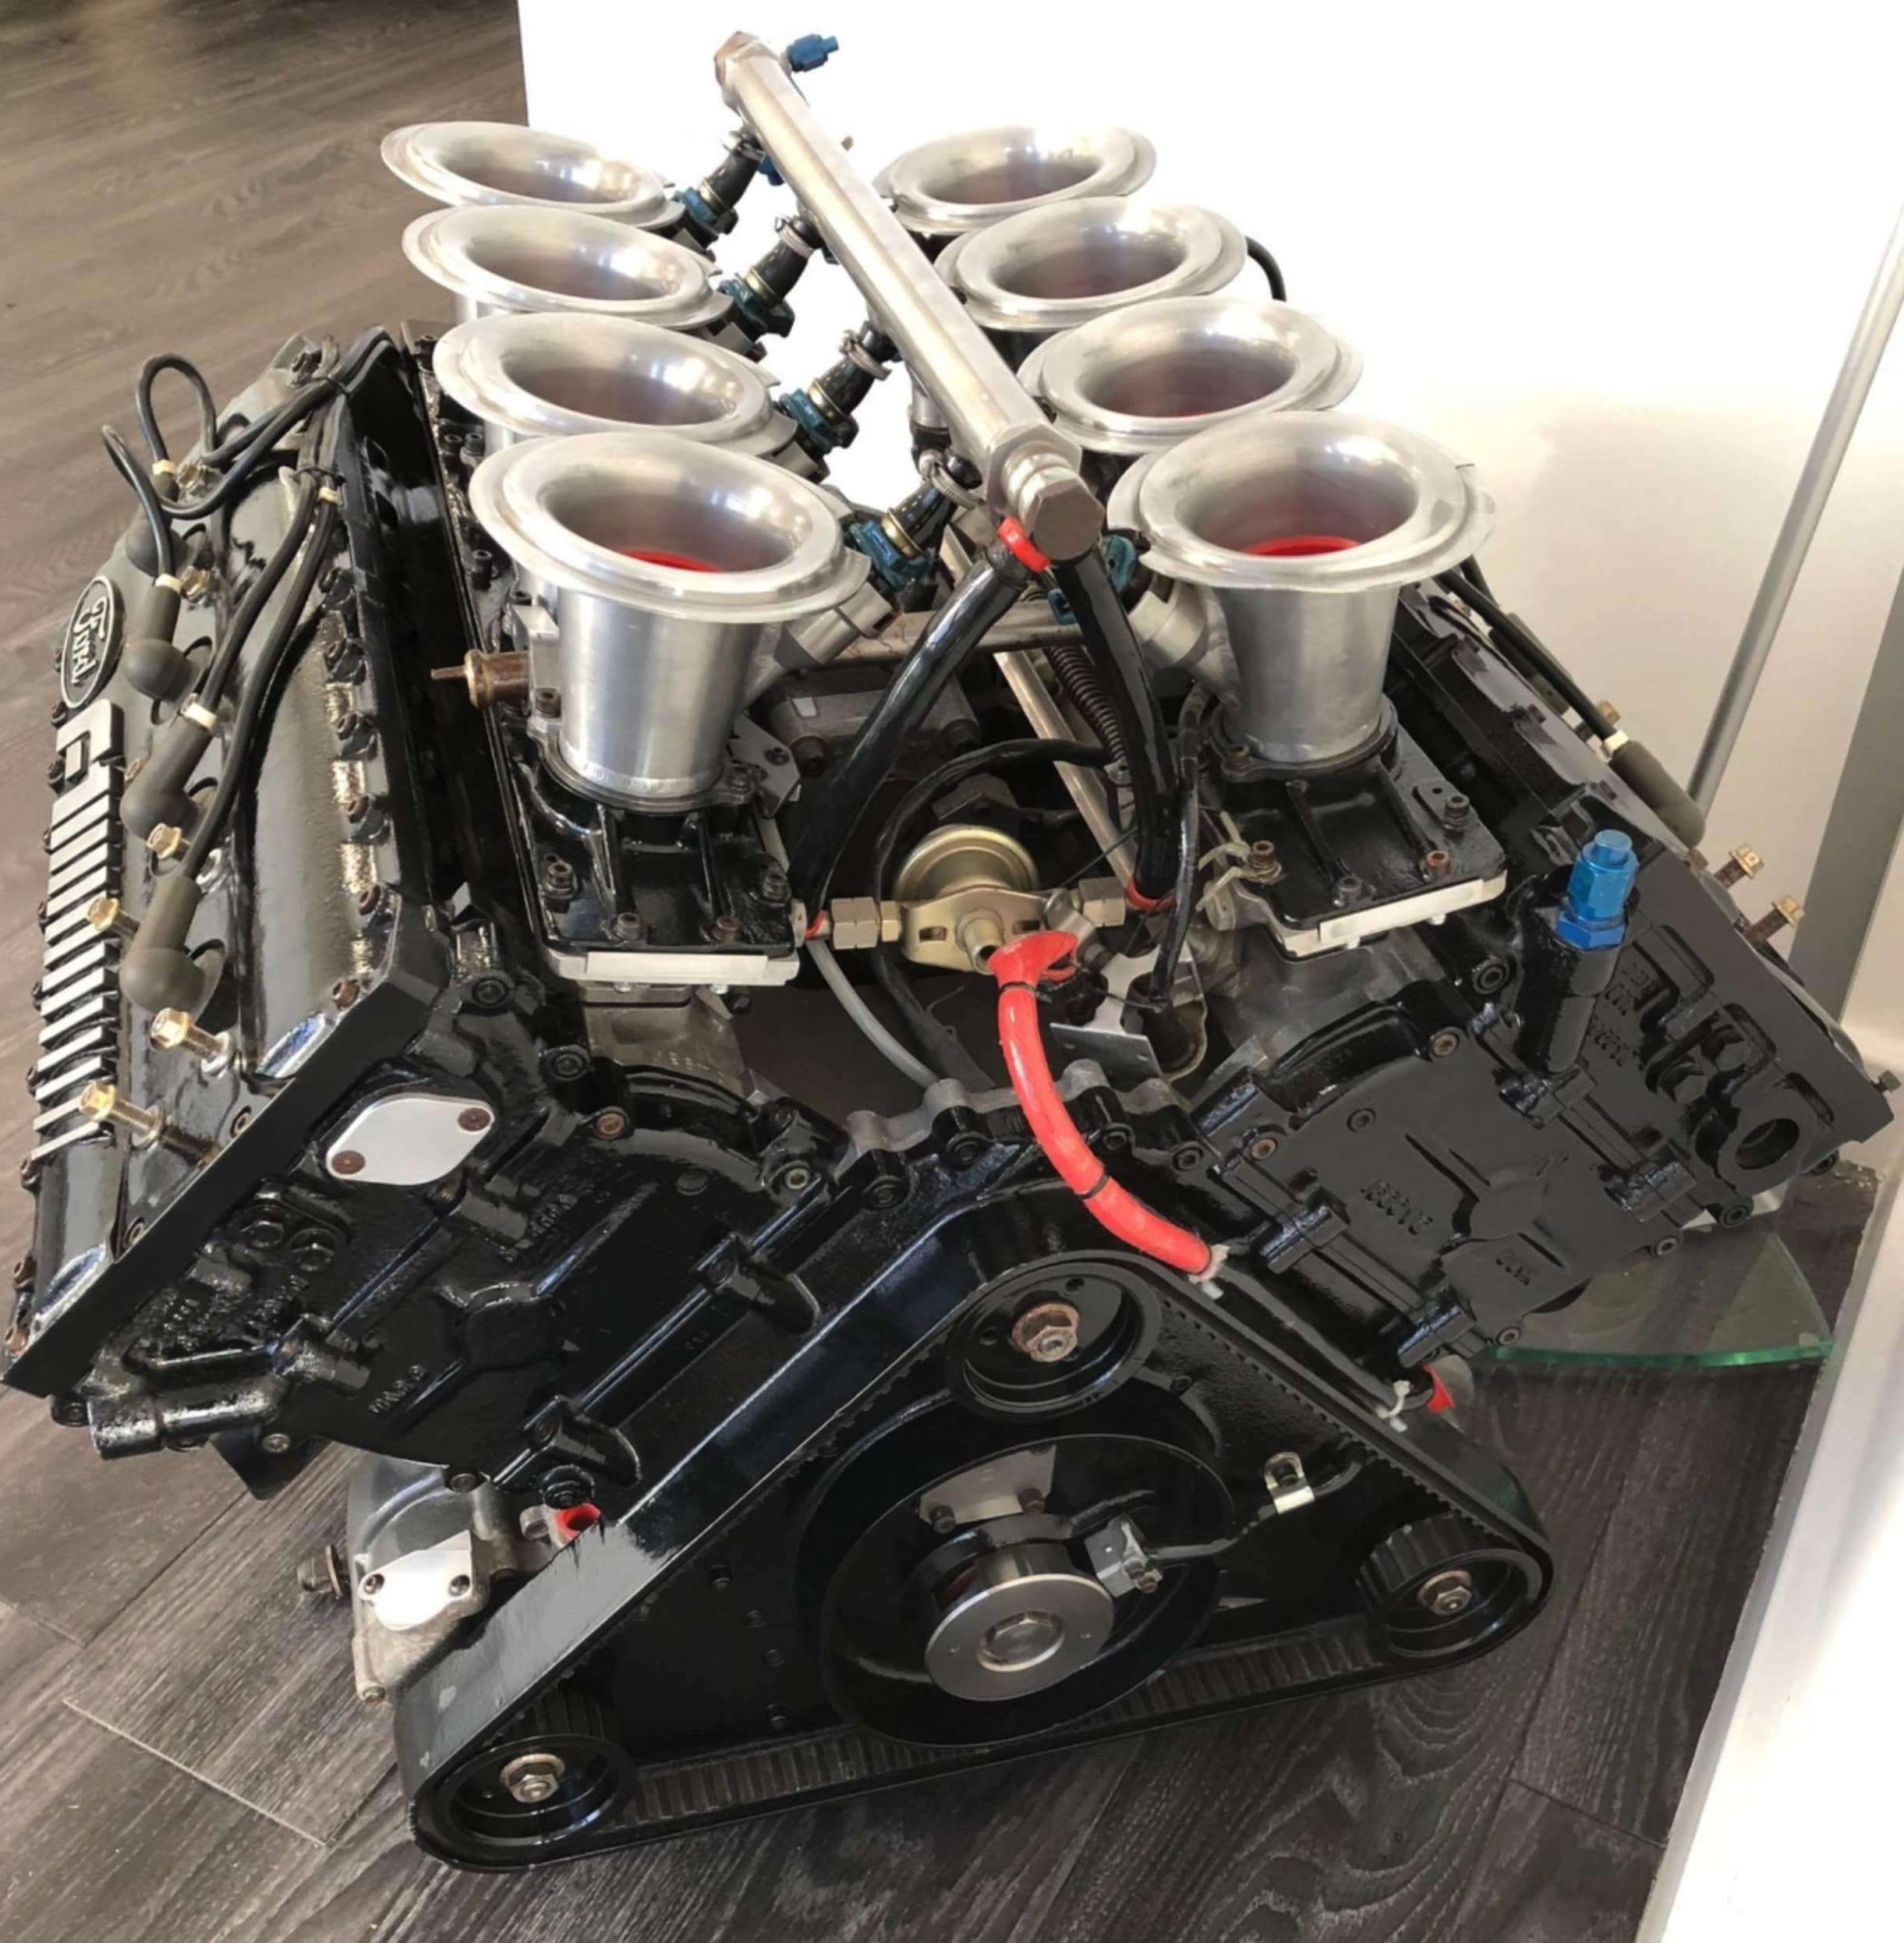

In [21]:
display.Image("images/Cosworth_DFV.jpg")

The Ford-Cosworth DFV V8 engine was successful in Formula One for several reasons.
1. It was a lightweight and compact design, ideal for racing cars.
2. The engine featured an aluminum alloy block and cylinder heads, and the use of four valves per cylinder allowed for better airflow and more efficient combustion.
3. The DFV was a very reliable engine, designed to be easy to maintain and service, with a modular construction that allowed for individual components to be easily replaced or repaired.
4. It was a powerful engine, capable of producing up to 400 horsepower in its later iterations, due in part to its advanced design, which included features such as a crossflow cylinder head.
5. The DFV was a very adaptable engine, easily modified and tuned to suit the needs of different teams and tracks.

In [22]:
f1_car = F1Car_v4(
    EngineFactory.create_engine_1960s_3L_ford_cosworth_dfv_engine_v1(),
    ChassisFactory.create_chassis_monocoque_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
)

In 1977, two radical technical innovations were introduced in Formula One. The Lotus 78 brought ground effect to the sport for the first time, using wing-profiled sidepods sealed to the ground by sliding lexan skirts. The Renault RS01, powered by a 1.5-litre turbocharged engine, was also introduced, becoming the first turbocharged engine used in Formula One.

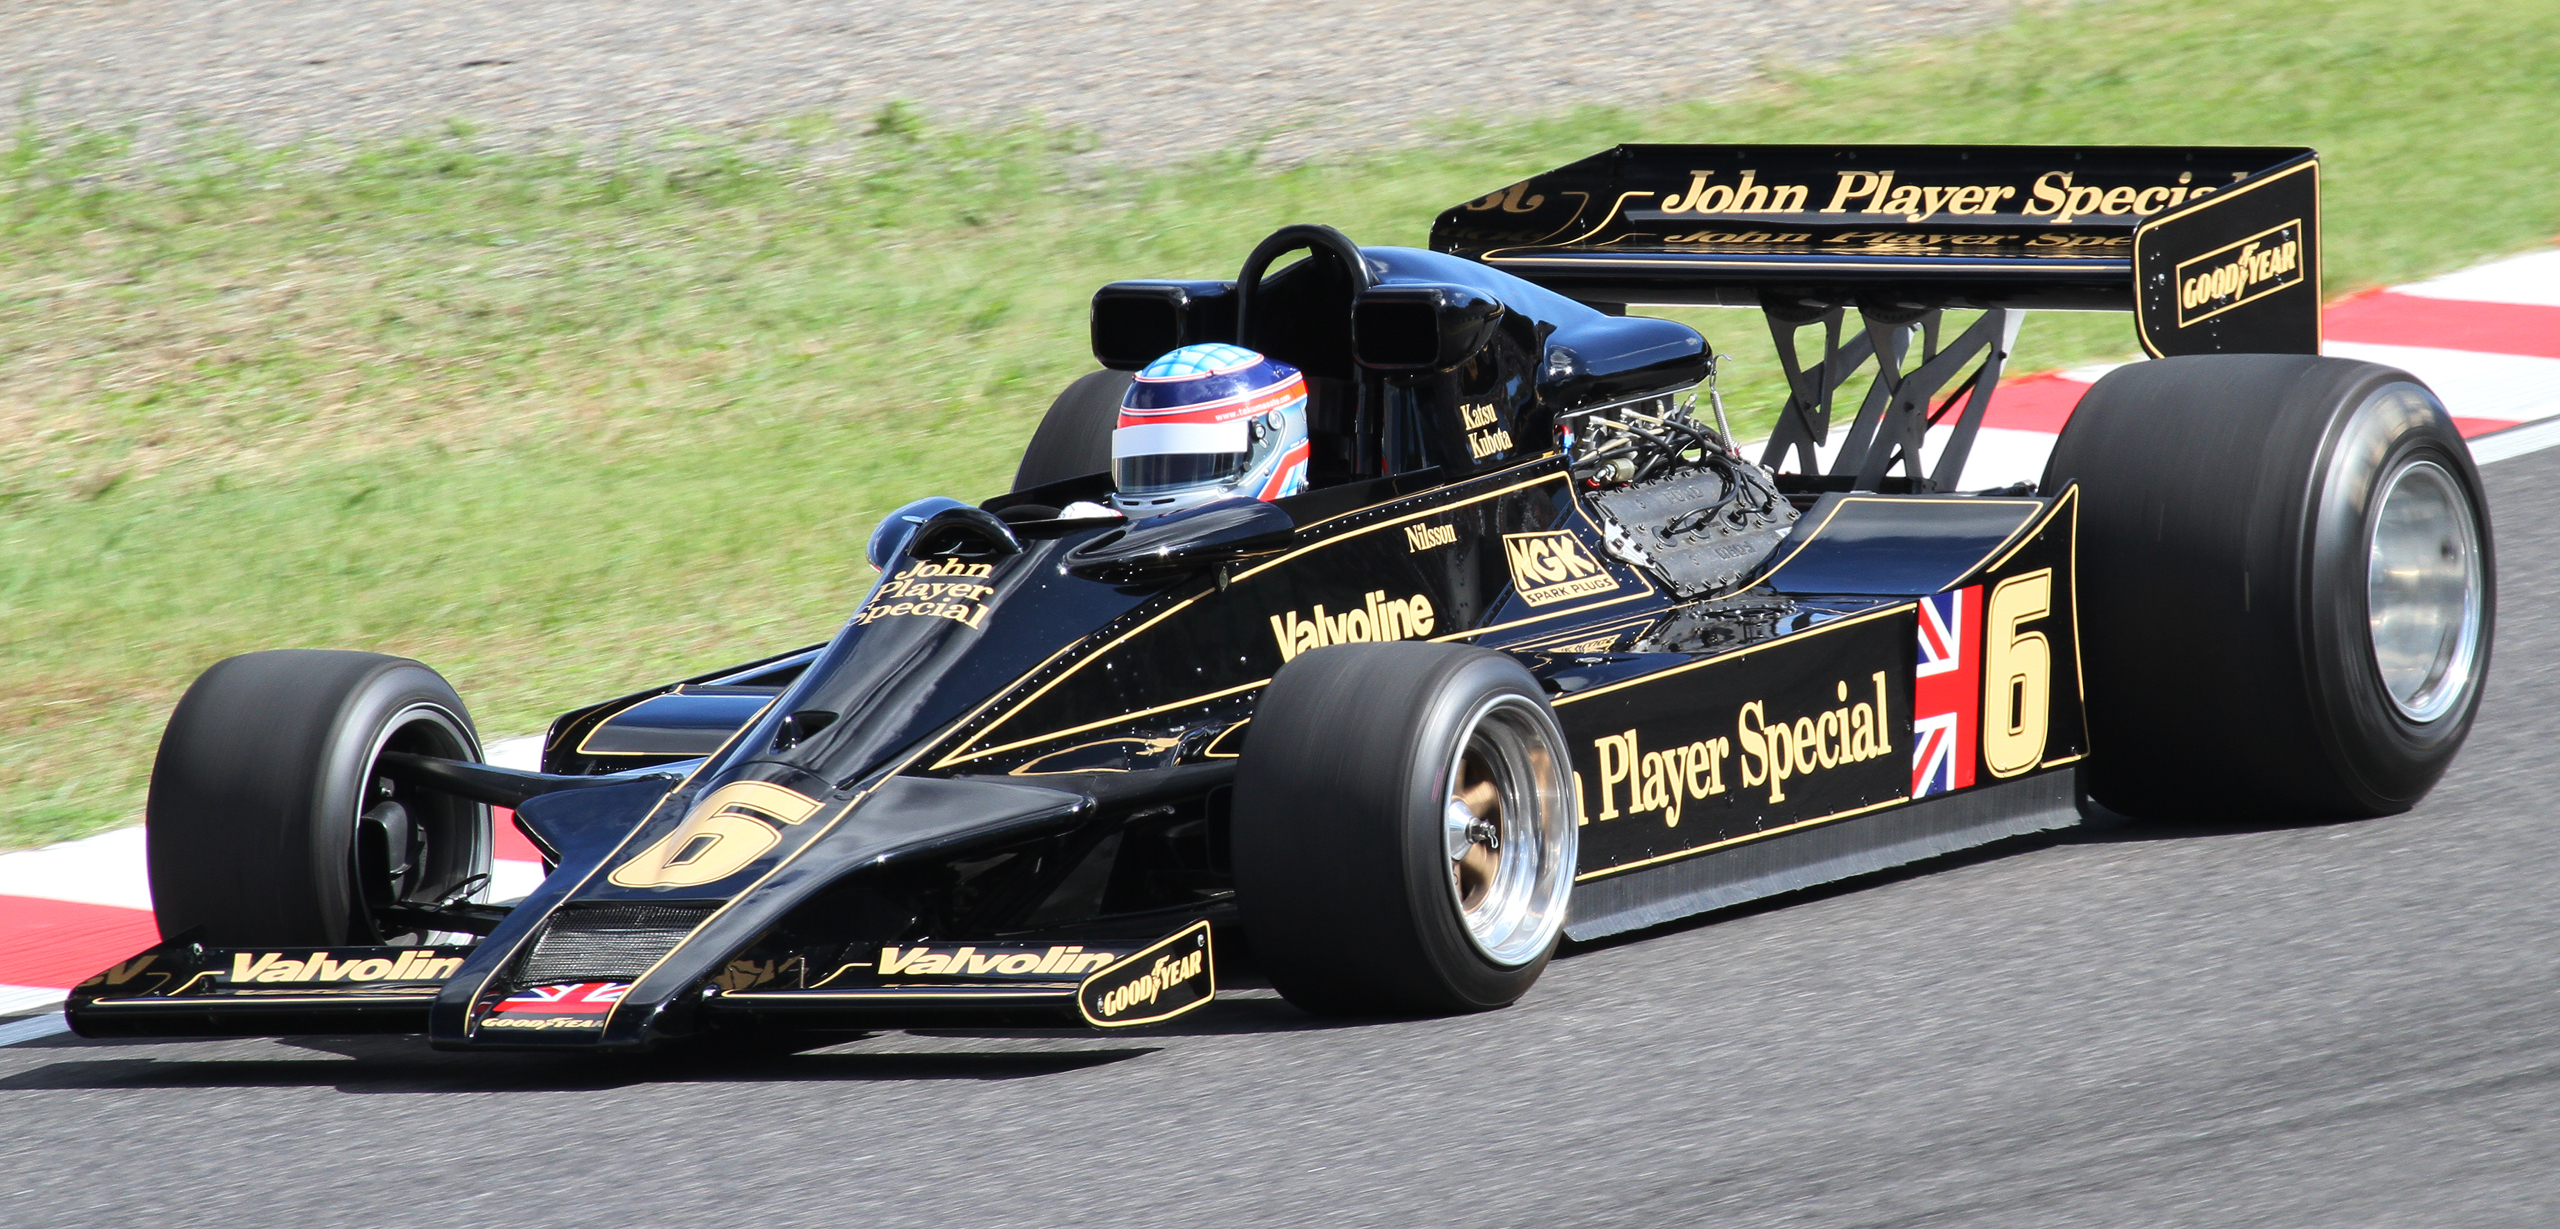

In [23]:
display.Image("images/Lotus78_winged_sidepods.jpeg")

In [24]:
f1_car = F1Car_v4(
    EngineFactory.create_engine_1970s_1_5L_renault_rs01_engine_v1(),
    ChassisFactory.create_chassis_monocoque_with_winged_sidepods_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
)

#### Dependency Inversion Principle: Creating Abstractions for Flexibility

With the introduction of Renault's turboengine, all other teams followed suit, and by the by the mid 1980s, almost all the cars were using a 1.5L engine with turbocharger. As a result of this, the way the engine had to be started was different so instead of calling `start` to start the engine, it had to be called `start_with_turbocharger` but they didn't communicate this to the team! The new engine was shipped and installed into the car:

In [25]:
f1_car = F1Car_v4(
    EngineFactory.create_engine_1980s_1_5L_turbocharged_v1(),
    ChassisFactory.create_chassis_monocoque_with_winged_sidepods_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
)

When it came to start the car, an error appeared!

In [26]:
from app.drivers.driver_v1 import Driver_v1

In [27]:
driver = Driver_v1()
driver.start_car(f1_car)

AttributeError: 'Engine1980s_1_5L_TurboCharged_v1' object has no attribute 'start'

Since the way the to start the engine has changed the F1 car could not be started! This is a disaster! As a workaround, the team made a hacky fix to update the car such that it changes the way an engine should be started depending on the type of engine it is receiving like so: 

In [32]:
from app.f1_cars.f1_car_v4_patched import F1Car_v4_patched

In [33]:
f1_car = F1Car_v4_patched(
    EngineFactory.create_engine_1980s_1_5L_turbocharged_v1(),
    ChassisFactory.create_chassis_monocoque_with_winged_sidepods_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
)

In [34]:
driver = Driver_v1()
driver.start_car(f1_car)

Engine has started with turbocharger


This works, but the same issue arises, if the engine being used by the car requires a different to start it, for example if a new version of the engine was created and had a different way to start the engine the car would have to be opened up for modifications again, which isn't ideal. To remedy the situation, the team created a specification which required all engines to be started in the same way:

In [35]:
from app.engine.interface import EngineInterface

This way, regardless of the modifications made to the engine, the way to start it would be the same, to put it into action we would make `EngineV3` a subclass of IEngine. This is a caveat in Python as there are no interface types so one of the ways to implement it is to use an abstract class with abstract methods:

In [36]:
from app.engine.engine_1980s_1_5L_turbocharged_v2 import (
    Engine1980s_1_5L_TurboCharged_v2,
)

Let's see what happens when we try to use it!

In [37]:
f1_car = F1Car_v4(
    EngineFactory.create_engine_1980s_1_5L_turbocharged_v2(),
    ChassisFactory.create_chassis_monocoque_with_winged_sidepods_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
)

TypeError: Can't instantiate abstract class Engine1980s_1_5L_TurboCharged_v2 with abstract method start

Here we see that the current engine does not conform to the specification that has been set forward by the team hence an error is being thrown

To remedy, we need to implement the `start` function

In [38]:
from app.engine.engine_1980s_1_5L_turbocharged_v3 import (
    Engine1980s_1_5L_TurboCharged_v3,
)

Now instead of the car depending on a class, it now depends on a interface. In other words, the dependencies of the car has been inverted. Now the car doesn't car about what kind of engine is being passed to it, as long as the engine implements the `start` method eveything should work the same way

In [39]:
f1_car = F1Car_v4(
    EngineFactory.create_engine_1980s_1_5L_turbocharged_v3(),
    ChassisFactory.create_chassis_monocoque_with_winged_sidepods_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
)

What we have done here is to depend on an abstraction instead of a concrete implementation. In this case, the concrete implementation is `Engine1980s_1_5L_TurboCharged_v3` whereas the abstraction is the `EngineInterface`. This is an application of the dependency inversion principle.

In [40]:
driver = Driver_v1()
driver.start_car(f1_car)

Engine has started with turbocharger


## Driving Change - Part 2: Building F1 Car Models with SOLID Principles
#### Subtitle: A Python-based Journey Through the 1980s to the current & future of F1 and the importance of Liskov Substitution Principle, and Interface Segregation

Over the years, two significant changes have taken place from the 1980s to the current era: the introduction of telemetry systems and the hybrid engine era. Telemetry systems have become a crucial part of F1 racing, allowing teams to monitor and collect real-time data on their cars' performance. On the other hand, the hybrid engine era started in 2014, which saw the introduction of eco-friendly technologies that combine traditional combustion engines with electric motors to improve fuel efficiency and reduce emissions. These advancements have created new challenges and opportunities for F1 teams and drivers, pushing the sport forward into a new era of technological innovation. However, with these changes came the need to adhere to software design principles such as the Liskov Substitution Principle and the Interface Segregation Principle, which are essential for maintaining robust and scalable software systems that can adapt to changing requirements and technologies.

### The Liskov Substitution Principle: Making sure behavioural changes are communicated

The formal definition of the Liskov Substitution Principle is:
```
Liskov's notion of a behavioural subtype defines a notion of substitutability for objects; that is, if S is a subtype of T, then objects of type T in a program may be replaced with objects of type S without altering any of the desirable properties of that program.
```

In a nutshell, it means one can find and replace all implementation of a superclass with it's subclass and the code should still work the same way. To break this down Barbara Liskov (the creator of the Liskov Substitution Principle) has detailed three main rules:
1. The **signature rule**
2. The **properties rule**
3. The **methods rule**

#### Liskov Substitution Principle: signature rule

The **signature rule** which states:
1. functions in the superclass should be implemented by the subclass
2. exceptions thrown in the subclass should be a subset of the exceptions handled by the superclass

In the late 1980s, telemetry was introduced to the car, as a result the car had to be upgraded. Telemetry is a system used in Formula 1 racing to gather data on the car's performance during a race. It allows the engineers to analyze the car's behavior and performance in real-time, helping the driver and the team make informed decisions about the car's setup and strategy. Learning from past mistakes, the team used this as a chance to create an interface for the `F1Car` so not only does the car depend on an abstraction of an engine, but the driver also depends on an abstraction of the car.

In [41]:
from app.f1_cars.f1_car_with_telemetry_v1 import F1CarWithTelemetry_v1
from app.f1_cars.interface import F1CarInterface
from app.telemetry_system import TelemetrySystemFactory

As a result of this, the driver needed to learn how to start the telemetry

In [42]:
from app.drivers.driver_v2 import Driver_v2

**Functions in the superclass should be implemented by the subclass**

Let's test out the car and see what telemetry gets recorded!

In [43]:
f1_car = f1_car = F1CarWithTelemetry_v1(
    EngineFactory.create_engine_1980s_1_5L_turbocharged_v3(),
    ChassisFactory.create_chassis_monocoque_with_winged_sidepods_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
    TelemetrySystemFactory.create_telemetry_system_v1(),
)

TypeError: Can't instantiate abstract class F1CarWithTelemetry_v1 with abstract method get_current_telemetry

Oops! Seems like the `get_current_telemetry` method wasn't implemented in the new car! This is a violation of the first part of the signature rule: functions in the superclass should be implemented by the subclass. Good thing we caught this before we went on the track!

In [44]:
from app.f1_cars.f1_car_with_telemetry_v2 import F1CarWithTelemetry_v2

In [45]:
f1_car = f1_car = F1CarWithTelemetry_v2(
    EngineFactory.create_engine_1980s_1_5L_turbocharged_v3(),
    ChassisFactory.create_chassis_monocoque_with_winged_sidepods_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
    TelemetrySystemFactory.create_telemetry_system_v1(),
)
driver = Driver_v2()
driver.start_car(f1_car)

Engine has started with turbocharger


In [46]:
driver.accelerate_car(f1_car, fuel_amount_in_milliliters=100)

Inject air into engine with better efficiency
Inject 100.0mL of fuel into engine with better efficiency


In [47]:
f1_car.get_telemetry_logs()

[]

What why is it empty?? Turns out that the driver forgot to enable the telemetry, as a result, the engineers made sure that the engine couldn't be started without start the telemetry without telling the driver

**Exceptions thrown in the subclass should be a subset of the exceptions handled by the superclass**

In [48]:
from app.f1_cars.f1_car_with_telemetry_v3 import F1CarWithTelemetry_v3

In [49]:
f1_car = f1_car = F1CarWithTelemetry_v3(
    EngineFactory.create_engine_1980s_1_5L_turbocharged_v3(),
    ChassisFactory.create_chassis_monocoque_with_winged_sidepods_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
    TelemetrySystemFactory.create_telemetry_system_v1(),
)
driver = Driver_v2()
driver.start_car(f1_car)

TelemetryNotEnabledError: The Engine has started but the telemetry hasn't been enabled!

On race day, when the driver tried to start the engine an error they had not seen before showed `TelemetryNotEnabledError`. Good thing this was before the race, and the engineers notified the driver to use the `enable_telemetry` function if they saw the error when starting the engine, then try to start the engine again.

In [50]:
from app.drivers.driver_v3 import Driver_v3

In [51]:
driver = Driver_v3()
driver.start_car(f1_car)

Car telemetry is not enabled. Enabling car telemetry...
Engine has started with turbocharger


In [52]:
driver.accelerate_car(f1_car, fuel_amount_in_milliliters=50)

Inject air into engine with better efficiency
Inject 50.0mL of fuel into engine with better efficiency


In [53]:
f1_car.get_telemetry_logs()

[{'fuel': 139.95}]

Even though an interface was defined, and all the methods were implemented for the car, the driver code still needed to be opened up for modification as the driver was unaware of new exceptions that were thrown! 

In the above sequence of events, both parts of the of the Liskov substitution principle called the **signature rule** were violated:

1. functions in the superclass should be implemented by the subclass, this was enforced by the F1CarInterface as we saw when the car didn't implement the `get_current_telemetry` function
2. exceptions thrown in the subclass should be a subset of the exceptions handled by the superclass, here the `TelemetryNotEnabledError` is only thrown in the new version of the car, and not the old one. As a result, the driver using the car was not aware it and as a result the new car can't be replaced by the old car without changing the code using it. 

#### Liskov substitution principle - properties rule

In 2014 came the hybrid era. The hybrid era meant incorporating it into the car.  As a result of incorporating the battery into the car, we had to make a few amendments, namely:

1. The maximum amount of logs that can be stored is 5
2. The check that ensured the telemetry was enabled when the engine was started was removed
3. The amount of fuel given being used by the car must be in multiples of 5

The **properties rule**  of the Liskov substituion principle states:

1. invariants should be enforced in the subclass
2. evolutionary properties - the side effects of the subclass must be a subset of the superclass.

In [54]:
from app.battery import BatteryFactory
from app.energy_recovery_system import EnergyRecoverySystemFactory
from app.f1_cars.hybrid_f1_car_with_telemetry_v1 import HybridF1CarWithTelemetry_v1

In [55]:
f1_car = HybridF1CarWithTelemetry_v1(
    EngineFactory.create_engine_2010s_1_6_L_hybrid_turbocharged_v1(),
    ChassisFactory.create_chassis_monocoque_with_winged_sidepods_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
    TelemetrySystemFactory.create_telemetry_system_v2(),
    BatteryFactory.create_battery_v1(),
    EnergyRecoverySystemFactory.create_energy_recovery_system_v1(),
)

Because of the addition of the battery and the energy recovery system, the driver needs to be able to activate and deactivate it `enable_boost` and `disable_boost` and to be able to handle the error `NotEnoughElectricityError`. Here the **signature rule** of the Liskov substituion principle described above is violated again. As a result, the `Driver` code implementation needs to be opened up again. Later we will see how the Interface Segregation will resolve these issue and futureproof the design of the code

**Invariants should be enforced in the subclass**

In [56]:
from app.drivers.driver_v4 import Driver_v4

In [57]:
driver = Driver_v4()
driver.start_car(f1_car)

Engine has started with turbocharger


Sweet now let's take it for a test drive!

In [58]:
driver.enable_boost(f1_car)
driver.accelerate_car(f1_car, fuel_amount_in_milliliters=50)

There isn't enough electricity, disable boost for now...
Inject air into engine with better efficiency
Inject 50.0mL of fuel into engine with better efficiency
Recovered 13888.890000000001W from MGU-H


Try the boost

In [59]:
driver.enable_boost(f1_car)
driver.accelerate_car(f1_car, fuel_amount_in_milliliters=10)

There isn't enough electricity, disable boost for now...
Inject air into engine with better efficiency
Inject 10.0mL of fuel into engine with better efficiency
Recovered 2777.7780000000002W from MGU-H


It doesn't work since there isn't enough electricity. When boosting the car requires 120000W 

In [60]:
driver.accelerate_car(f1_car, fuel_amount_in_milliliters=1000)

Inject air into engine with better efficiency
Inject 1000.0mL of fuel into engine with better efficiency
Recovered 277777.8W from MGU-H


In [61]:
driver.enable_boost(f1_car)
driver.accelerate_car(f1_car, fuel_amount_in_milliliters=10)

Boost engine with 120000W of electricity
Inject air into engine with better efficiency
Inject 10.0mL of fuel into engine with better efficiency
Recovered 2777.7780000000002W from MGU-H


Sweet now let's check the telemetry!

In [62]:
telemetry = f1_car.get_telemetry_logs()

In [63]:
telemetry

[]

Why is this an empty list?! It is because an invariant enforced by previous versions of the car was removed and the driver forgot to enable the telemetry via `enable_car_telemetry`. In the past, the driver was notified of the `TelemetryNotEnabledError` and was able to rectify it by enabling the telemetry, but as a result of the invariant being removed the telemetry data isn't being recorded! To fix this, the invariant in the previous versions can be reintroduced:  

**Evolutionary properties - the side effects of the subclass must be a subset of the superclass**

In [64]:
from app.f1_cars.hybrid_f1_car_with_telemetry_v2 import HybridF1CarWithTelemetry_v2

In [65]:
f1_car = HybridF1CarWithTelemetry_v2(
    EngineFactory.create_engine_2010s_1_6_L_hybrid_turbocharged_v1(),
    ChassisFactory.create_chassis_monocoque_with_winged_sidepods_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
    TelemetrySystemFactory.create_telemetry_system_v2(),
    BatteryFactory.create_battery_v1(),
    EnergyRecoverySystemFactory.create_energy_recovery_system_v1(),
)
driver = Driver_v4()
driver.start_car(f1_car)

Car telemetry is not enabled. Enabling car telemetry...
Engine has started with turbocharger


The introduction of the maximum number of logs constraint means only the last 5 logs can be recorded

In [67]:
test_drive(driver, f1_car, fuel_amount_used_fn=lambda: choice(range(5, 150, 5)))
f1_car.get_telemetry_logs()

Inject air into engine with better efficiency
Inject 75.0mL of fuel into engine with better efficiency
Recovered 20833.335000000003W from MGU-H
Inject air into engine with better efficiency
Inject 120.0mL of fuel into engine with better efficiency
Recovered 33333.336W from MGU-H
Inject air into engine with better efficiency
Inject 10.0mL of fuel into engine with better efficiency
Recovered 2777.7780000000002W from MGU-H
Inject air into engine with better efficiency
Inject 40.0mL of fuel into engine with better efficiency
Recovered 11111.112000000001W from MGU-H
Inject air into engine with better efficiency
Inject 95.0mL of fuel into engine with better efficiency
Recovered 26388.891W from MGU-H
Inject air into engine with better efficiency
Inject 65.0mL of fuel into engine with better efficiency
Recovered 18055.557W from MGU-H
Inject air into engine with better efficiency
Inject 60.0mL of fuel into engine with better efficiency
Recovered 16666.668W from MGU-H
Inject air into engine with

[{'electricity': 112500.009},
 {'electricity': 129166.67700000001},
 {'electricity': 161111.124},
 {'electricity': 165277.791},
 {'electricity': 204166.683}]

In [68]:
from app.battery.electricity import Electricity


def calculate_average_electricity_recovered_for_each_acceleration(telemetry_logs):
    electricity_recovered = []
    for previous, current in zip(telemetry_logs, telemetry_logs[1:]):
        electricity_recovered.append(current["electricity"] - previous["electricity"])
    return Electricity.create_from_amount_in_watts(
        sum(electricity_recovered) / len(electricity_recovered)
    )

The function above requires all logs be recorded to see the average electrcity recovered over the duration of the test, but only the last 5 logs are recorded so as a result the out of this function will be erroneous

In [69]:
calculate_average_electricity_recovered_for_each_acceleration(
    f1_car.get_telemetry_logs()
).amount_in_watts

22916.668499999996

To fix this, we would need to update the telemetry system such that the evolutionary properties stays consistent

In [70]:
f1_car = HybridF1CarWithTelemetry_v2(
    EngineFactory.create_engine_2010s_1_6_L_hybrid_turbocharged_v1(),
    ChassisFactory.create_chassis_monocoque_with_winged_sidepods_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
    TelemetrySystemFactory.create_telemetry_system_v3(),
    BatteryFactory.create_battery_v1(),
    EnergyRecoverySystemFactory.create_energy_recovery_system_v1(),
)
driver = Driver_v4()
driver.start_car(f1_car)

Car telemetry is not enabled. Enabling car telemetry...
Engine has started with turbocharger


In [71]:
test_drive(driver, f1_car, lambda: choice(range(5, 150, 5)))
f1_car.get_telemetry_logs()

Inject air into engine with better efficiency
Inject 125.0mL of fuel into engine with better efficiency
Recovered 34722.225W from MGU-H
Inject air into engine with better efficiency
Inject 10.0mL of fuel into engine with better efficiency
Recovered 2777.7780000000002W from MGU-H
Inject air into engine with better efficiency
Inject 45.0mL of fuel into engine with better efficiency
Recovered 12500.001W from MGU-H
Inject air into engine with better efficiency
Inject 70.0mL of fuel into engine with better efficiency
Recovered 19444.446W from MGU-H
Inject air into engine with better efficiency
Inject 110.0mL of fuel into engine with better efficiency
Recovered 30555.558W from MGU-H
Inject air into engine with better efficiency
Inject 85.0mL of fuel into engine with better efficiency
Recovered 23611.113W from MGU-H
Inject air into engine with better efficiency
Inject 120.0mL of fuel into engine with better efficiency
Recovered 33333.336W from MGU-H
Inject air into engine with better efficien

[{'electricity': 34722.225},
 {'electricity': 37500.003},
 {'electricity': 50000.004},
 {'electricity': 69444.45},
 {'electricity': 100000.008},
 {'electricity': 123611.121},
 {'electricity': 156944.457},
 {'electricity': 166666.68},
 {'electricity': 193055.571},
 {'electricity': 201388.905}]

In the two scenarios above, we have violated part two of the Liskov substitution principle, the **properties rule** it states:

1. invariants should be enforced in the subclass, telemetry should always be enabled when the engine is started
2. evolutionary properties - the side effects of the subclass must be a subset of the superclass. In our case, the superclass keeps a transaction of all the logs when the accelerator was pushed; whilst the subclass only keeps the latest x)

#### Liskov substitution principle - methods rule

The **methods rule** states:
1. Methods must have weaker preconditions.
2. Methods must have stronger postconditions.

**Methods must have weaker preconditions**

Due to the limitation of the hybrid car not being able to take in fuel which are a mutiple of 5, the client code (the `Driver`) will again be exposed to an error that they are unaware of, causing an issue on the track (a run-time Exception)

In [72]:
driver.accelerate_car(f1_car, fuel_amount_in_milliliters=8)

Inject air into engine with better efficiency


InvalidFuelAmountError: Fuel amount in milliliters injected is not in multiples of 5

To fix this the `Driver` code has to be opened up again for modification

In [73]:
from app.drivers.driver_v5 import Driver_v5

In [74]:
f1_car = HybridF1CarWithTelemetry_v2(
    EngineFactory.create_engine_2010s_1_6_L_hybrid_turbocharged_v1(),
    ChassisFactory.create_chassis_monocoque_with_winged_sidepods_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
    TelemetrySystemFactory.create_telemetry_system_v3(),
    BatteryFactory.create_battery_v1(),
    EnergyRecoverySystemFactory.create_energy_recovery_system_v1(),
)
driver = Driver_v5()
driver.start_car(f1_car)

Car telemetry is not enabled. Enabling car telemetry...
Engine has started with turbocharger


In [76]:
from random import choice


def test_drive(driver, f1_car, fuel_amount_used_fn, n_tests=10):
    for _ in range(n_tests):
        driver.accelerate_car(f1_car, fuel_amount_in_milliliters=fuel_amount_used_fn())

In [77]:
test_drive(driver, f1_car, fuel_amount_used_fn=lambda: choice(range(1, 150)))

Inject air into engine with better efficiency
Fuel amount used was 28 but amount is invalid so rounding up to 30
Inject air into engine with better efficiency
Inject 30.0mL of fuel into engine with better efficiency
Recovered 8333.334W from MGU-H
Inject air into engine with better efficiency
Fuel amount used was 124 but amount is invalid so rounding up to 125
Inject air into engine with better efficiency
Inject 125.0mL of fuel into engine with better efficiency
Recovered 34722.225W from MGU-H
Inject air into engine with better efficiency
Fuel amount used was 124 but amount is invalid so rounding up to 125
Inject air into engine with better efficiency
Inject 125.0mL of fuel into engine with better efficiency
Recovered 34722.225W from MGU-H
Inject air into engine with better efficiency
Fuel amount used was 1 but amount is invalid so rounding up to 5
Inject air into engine with better efficiency
Inject 5.0mL of fuel into engine with better efficiency
Recovered 1388.8890000000001W from MGU

**Methods must have stronger postconditions**

A violate of stronger postconditions is shown below where the telemetry logs in of the current car only returns the telemetry for `Electricity` even though in the 1980s car it returns the `Fuel`. As a result of this, any code that depends on the output of the telemetry may break. For example, the `calculate_average_fuel_usage_for_each_acceleration` below would not work

In [78]:
from app.fuel_tank.fuel import Fuel


def calculate_average_fuel_usage_for_each_acceleration(telemetry_logs):
    fuel_used = []
    for previous, current in zip(telemetry_logs, telemetry_logs[1:]):
        fuel_used.append(previous["fuel"] - current["fuel"])
    return Fuel.create_from_amount_in_liters(sum(fuel_used) / len(fuel_used))

In [81]:
telemetry_logs = f1_car.get_telemetry_logs()
calculate_average_fuel_usage_for_each_acceleration(telemetry_logs)

KeyError: 'fuel'

We can see that only electricity is recorded in the telemetry, not the fuel

In [82]:
telemetry_logs

[{'electricity': 23611.113},
 {'electricity': 51388.893000000004},
 {'electricity': 91666.674},
 {'electricity': 108333.342},
 {'electricity': 150000.01200000002},
 {'electricity': 155555.56800000003},
 {'electricity': 187500.015},
 {'electricity': 211111.12800000003},
 {'electricity': 220833.35100000002},
 {'electricity': 247222.24200000003},
 {'electricity': 255555.57600000003},
 {'electricity': 290277.80100000004},
 {'electricity': 325000.026},
 {'electricity': 326388.91500000004},
 {'electricity': 338888.916},
 {'electricity': 345833.36100000003},
 {'electricity': 383333.36400000006},
 {'electricity': 418055.58900000004},
 {'electricity': 447222.25800000003},
 {'electricity': 466666.704}]

Here, we can again modify the car to ensure the post conditions:

In [83]:
from app.f1_cars.hybrid_f1_car_with_telemetry_v3 import HybridF1CarWithTelemetry_v3

In [84]:
driver = Driver_v5()
f1_car = HybridF1CarWithTelemetry_v3(
    EngineFactory.create_engine_2010s_1_6_L_hybrid_turbocharged_v1(),
    ChassisFactory.create_chassis_spaceframe_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
    TelemetrySystemFactory.create_telemetry_system_v3(),
    BatteryFactory.create_battery_v1(),
    EnergyRecoverySystemFactory.create_energy_recovery_system_v1(),
)
driver.start_car(f1_car)
test_drive(driver, f1_car, fuel_amount_used_fn=lambda: choice(range(1, 150)))

Car telemetry is not enabled. Enabling car telemetry...
Engine has started with turbocharger
Inject air into engine with better efficiency
Fuel amount used was 104 but amount is invalid so rounding up to 105
Inject air into engine with better efficiency
Inject 105.0mL of fuel into engine with better efficiency
Recovered 29166.669W from MGU-H
Inject air into engine with better efficiency
Fuel amount used was 71 but amount is invalid so rounding up to 75
Inject air into engine with better efficiency
Inject 75.0mL of fuel into engine with better efficiency
Recovered 20833.335000000003W from MGU-H
Inject air into engine with better efficiency
Fuel amount used was 92 but amount is invalid so rounding up to 95
Inject air into engine with better efficiency
Inject 95.0mL of fuel into engine with better efficiency
Recovered 26388.891W from MGU-H
Inject air into engine with better efficiency
Fuel amount used was 76 but amount is invalid so rounding up to 80
Inject air into engine with better eff

In [85]:
telemetry_logs = f1_car.get_telemetry_logs()

In [86]:
telemetry_logs

[{'electricity': 29166.669, 'fuel': 139.791},
 {'electricity': 50000.004, 'fuel': 139.645},
 {'electricity': 76388.895, 'fuel': 139.458},
 {'electricity': 98611.119, 'fuel': 139.302},
 {'electricity': 126388.899, 'fuel': 139.202},
 {'electricity': 166666.68, 'fuel': 138.915},
 {'electricity': 184722.237, 'fuel': 138.787},
 {'electricity': 208333.35, 'fuel': 138.621},
 {'electricity': 211111.128, 'fuel': 138.60500000000002},
 {'electricity': 226388.907, 'fuel': 138.55}]

In [87]:
average_fuel_usage = calculate_average_fuel_usage_for_each_acceleration(telemetry_logs)
average_electricity_recovered = (
    calculate_average_electricity_recovered_for_each_acceleration(telemetry_logs)
)

In [88]:
print(f"Average fuel usage per acceleration is: {average_fuel_usage.amount_in_liters}L")
print(
    f"Average electricity recovery per acceleration is: {average_electricity_recovered.amount_in_watts}W"
)

Average fuel usage per acceleration is: 0.13788888888888728L
Average electricity recovery per acceleration is: 21913.582000000002W


The **methods rule** states:
1. Methods must have weaker preconditions. An example of this violation is the restriction of the fuel amount injected to engine having to be in multiples of 5mL in the hybrid engine in the 2010s is needed, whereas this isn't needed in the 1980s engine. The result of this is even though the 2010 hybrid engine conformed to the `EngineInterface` because the `inject_fuel` method of the `Engine` had a weaker precondition (the restriction of only being able to take fuel in multiples of 5mL) there is an exception that the client code (the `Driver`) doesn't know how to handle.

2. Methods must have stronger postconditions, in our case, the `get_telemetry_logs` method has a weaker postcondition as initially the telemetry from both fuel and electricity were returned, whereas now only the telemtetry from the fuel is returned

While, SRP, DI, and OCP deals with the extendability of the code itself. The Liskov Substitution Principle deals with the clients of code, we see here that the car, is working as intended, but the clients of the car break as it doesn't adhere to the rules set forth by the Liskov Substitution Princple.

### Interface segregation principle: Generalizing for the past, present and future

As Formula 1 continues to evolve and embrace new technologies, it's clear that the future of the sport will be shaped by cutting-edge innovations and unprecedented levels of data analysis. From hybrid engines and aerodynamic advancements to the use of machine learning and artificial intelligence, there's no doubt that F1 will remain at the forefront of technological innovation for years to come.

However, as new technologies emerge and teams seek to gain a competitive edge, it's more important than ever to ensure that the code powering these advancements is designed to be flexible, modular, and future-proof. That's where the Interface Segregation Principle (ISP) comes into play.

The Interface Segregation Principle (ISP) focuses on the idea that a class should not be forced to implement an interface that contains methods that it does not need or use. This means that interfaces should be segregated into smaller, more specific interfaces, each containing only the methods needed by the classes that will implement them. 

Even though the driver depends on an abstraction, the `F1CarInterface` and not a concrete implementation, the abstraction is very broad and doesn't have enough information. This manifests itself in the `Driver` code where the `start_car` and `accelerate_car` has a bunch of code dealing with whether the car is a hybrid or non-hybrid car. The issue right now we don't know the type of `F1Car` we are dealing with, as a result we can only be defensive about our programming and catch errors then input the required logic (for example the `InvalidFuelAmountError`) as a result the driver code is polluted with a lot of code which is only specific to a type of car. Therefore, if there was ever a new kind of car that the `Driver` hasn't dealt with the `Driver` code would need to be opened up and change.

By segregating the interfaces, even if there were new cars, the `Driver` code wouldn't need to be opened up as a new class could be implemented; thus making the `Driver` code a lot more extendible. Moreover, the segregated interfaces could also be used by the older cars! For example, the `F1CarInterface` doesn't work for the previous cars as we had to keep updating it, for example if we tried to use the `F1CarInterface` on `F1Car_v1` it wouldn't work, and if we had to make it work stubs would have to be created for all the methods that aren't currently implemented, but by segregating the interfaces the old cars are only required to implement the relevant interfaces.

In [276]:
from app.f1_cars.interface import (
    HybridAccelerableInterface,
    NonHybridAccelerableInterface,
    StartableInterface,
    TelemetryInterface,
)

In [277]:
from app.f1_cars.f1_car_v5 import F1Car_v5
from app.f1_cars.f1_car_with_telemetry_v4 import F1CarWithTelemetry_v4
from app.f1_cars.hybrid_f1_car_with_telemetry_v4 import HybridF1CarWithTelemetry_v4

In [282]:
hybrid_f1_car_with_telemetry = HybridF1CarWithTelemetry_v4(
    EngineFactory.create_engine_2010s_1_6_L_hybrid_turbocharged_v1(),
    ChassisFactory.create_chassis_monocoque_with_winged_sidepods_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
    TelemetrySystemFactory.create_telemetry_system_v3(),
    BatteryFactory.create_battery_v1(),
    EnergyRecoverySystemFactory.create_energy_recovery_system_v1(),
)

In [283]:
non_hybrid_f1_car_with_telemetry = F1CarWithTelemetry_v4(
    EngineFactory.create_engine_1980s_1_5L_turbocharged_v3(),
    ChassisFactory.create_chassis_monocoque_with_winged_sidepods_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
    TelemetrySystemFactory.create_telemetry_system_v2(),
)

In [285]:
non_hybrid_f1_car = F1Car_v5(
    EngineFactory.create_engine_1950s_2_5L_naturally_aspirated_v2(),
    ChassisFactory.create_chassis_monocoque_with_winged_sidepods_v1(),
    WheelsFactory.create_wheels_v1(),
    FuelTankFactory.create_fuel_tank_v1(),
)

Also, now there is more information about the characteristics of the car, therefore different driver classes can be created for different kinds of cars. The logic for determining what kind of driver to create can be encapsulated into a factory like so:

In [286]:
from app.drivers import DriverFactory

In [287]:
driver = DriverFactory.create_driver_from_car(hybrid_f1_car_with_telemetry)

In [288]:
type(driver)

app.drivers.driver_for_hybrid_with_telemetry.DriverForHybridWithTelemetry

In [289]:
driver = DriverFactory.create_driver_from_car(non_hybrid_f1_car_with_telemetry)

In [290]:
type(driver)

app.drivers.driver_for_non_hybrid_with_telemetry.DriverForNonHybridWithTelemetry

In [291]:
driver = DriverFactory.create_driver_from_car(non_hybrid_f1_car)

In [292]:
type(driver)

app.drivers.driver_for_non_hybrid_without_telemetry.DriverForNonHybridWithoutTelemetry

Moreover, if a new type of car needed to be modelled which has functions which can't be represented by the interface, then no code would have to be modified, we could simply add another if statement to the driver factory, add another interface and then you will be done!